   Unnamed: 0    hosp  hosp.1  hosp.2     rea   rea.1  rea.2     rad   rad.1  \
2  2020-03-18  2972.0  1685.0  1248.0   771.0   525.0  239.0   816.0   432.0   
3  2020-03-19  4073.0  2256.0  1632.0  1002.0   689.0  284.0  1180.0   580.0   
4  2020-03-20  5226.0  2912.0  2134.0  1297.0   905.0  362.0  1587.0   777.0   
5  2020-03-21  5900.0  3298.0  2401.0  1453.0  1018.0  401.0  1811.0   881.0   
6  2020-03-22  6954.0  3906.0  2815.0  1674.0  1176.0  461.0  2117.0  1031.0   

    rad.2     dc   dc.1   dc.2  
2   379.0  218.0  121.0   96.0  
3   562.0  327.0  179.0  136.0  
4   764.0  450.0  250.0  190.0  
5   888.0  525.0  297.0  219.0  
6  1040.0  632.0  356.0  263.0  


C:\Users\poulp\AppData\Local\Temp\ipykernel_4900\3833036392.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dc_df.groupby(dc_df['Unnamed: 0'].dt.to_period('M')).sum().plot(kind='bar')


<Axes: xlabel='Unnamed: 0'>

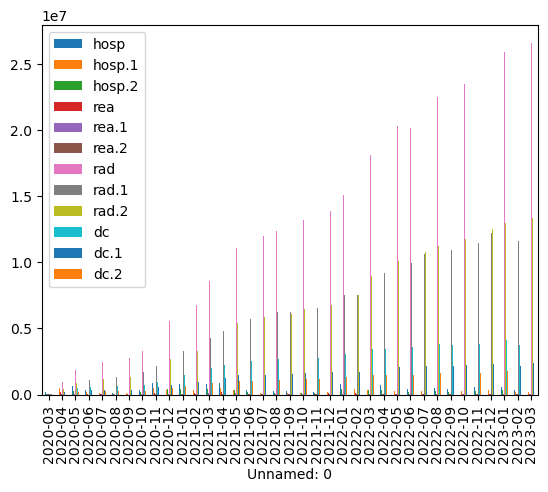

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import sklearn.datasets as datasets

dc_df = pd.read_csv('../1/sources/reduced_covid_sexe.csv')
dc = dc_df.dc.drop([0,1], axis=0)
dc = dc.to_numpy()
jours = np.arange(dc.shape[0]).reshape(-1, 1)

# methode pour découper le dataframe par mois et visualiser le resultat
dc_df = dc_df.drop([0,1], axis=0)
print(dc_df.head())
dc_df['Unnamed: 0'] = pd.to_datetime(dc_df['Unnamed: 0'])
dc_df.groupby(dc_df['Unnamed: 0'].dt.to_period('M')).sum().plot(kind='bar')

# print(dc)
# print(jours)

# plt.plot(jours, dc, 'o')
# plt.draw()


0.9540591813559234


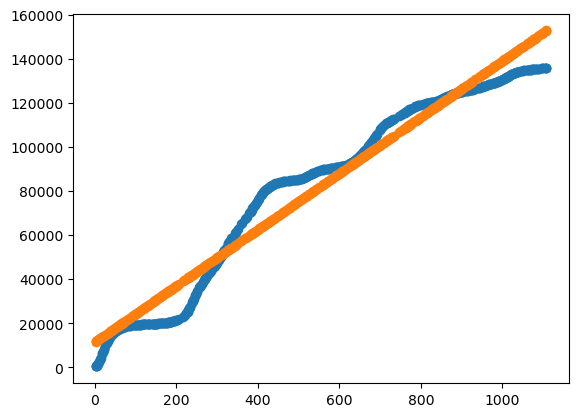

In [3]:
# faire les jeux de données pour le test et l’entrainement

xtrain, xtest, ytrain, ytest = train_test_split(jours, dc, test_size=0.5)

# train model
model = LinearRegression()
model.fit(xtrain, ytrain)
print(model.score(xtrain, ytrain))

# show predicted datas
predic = model.predict(xtest)
plt.plot(xtest, ytest, 'o')
plt.plot(xtest, predic, 'o')


0.9815473279852192


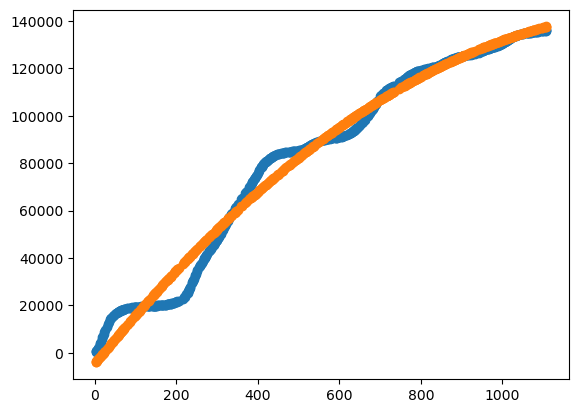

In [4]:
# refaire avec un polynome ?

poly = PolynomialFeatures(degree=2)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.fit_transform(xtest)

model = LinearRegression()
model.fit(xtrain_poly, ytrain)
print(model.score(xtrain_poly, ytrain))

pred_poly = model.predict(xtest_poly)
plt.plot(xtest, ytest, 'o')
plt.plot(xtest, pred_poly, 'o')
plt.draw()


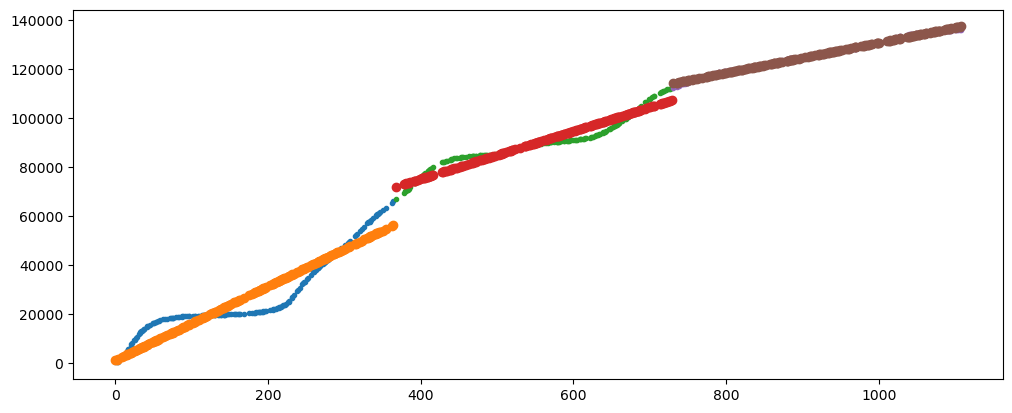

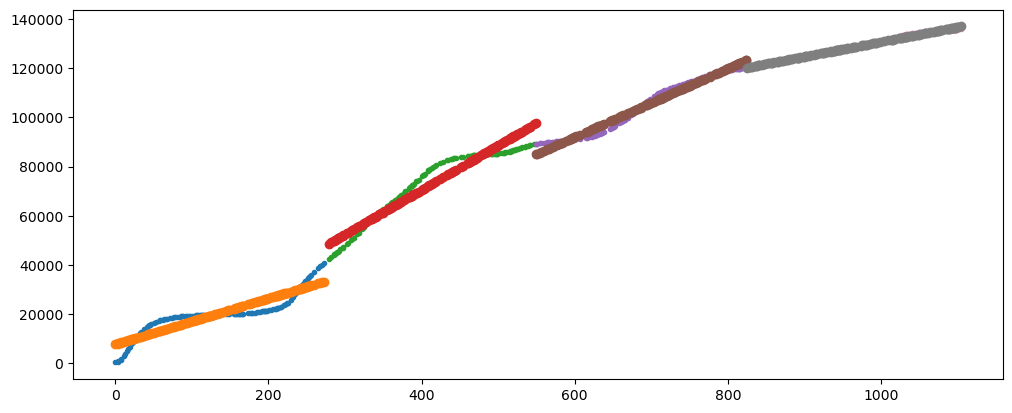

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# découpage manuel du tableau
# on va devoir le faire de nombreuses fois donc on va faire une fonction

# automatise le calcul des valeurs prédites
def autofit(x, y, polyfit=0, t_size=.5) :
    
    model = LinearRegression()
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=t_size)

    if polyfit > 1 :
        poly = PolynomialFeatures(degree=polyfit)
        xtrain = poly.fit_transform(xtrain)
        xtest_poly = poly.fit_transform(xtest)

    model.fit(xtrain, ytrain)

    # pred = np.array(0)
    if polyfit > 1 : pred = model.predict(xtest_poly)
    else : pred = model.predict(xtest)

    return xtest, ytest, pred

# découpe un dataset selon un tableau de valeurs limites et affiche le resultat sur
# le même graphique
def splitplot(x_data, y_data, split:list):

    plt.figure().set_figwidth(12)
    split.append(-1)
    nprev = 0
    for n in split :
        x, ydata, ypred = autofit(x_data[nprev:n], y_data[nprev:n], polyfit=1)
        plt.plot(x, ydata, '.')
        plt.plot(x, ypred, 'o')
        nprev = n
    plt.show()

div3 = [365,730]
div4 = [275,550,825]

splitplot(jours, dc, div3)
splitplot(jours, dc, div4)


[255, 376, 693]


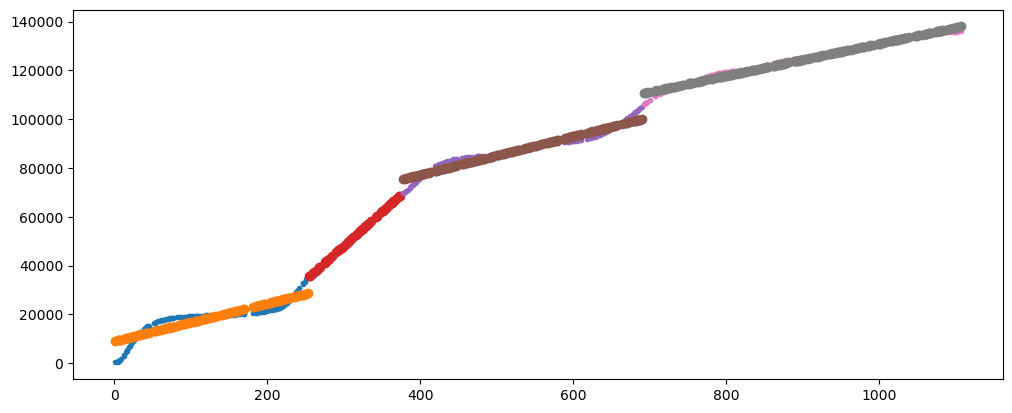

In [6]:
# autodécoupage avec l‘arbre de décision

from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=2)
clf = clf.fit(jours, dc)

div_tree = [int(x) for x in clf.tree_.threshold if x > 0]
div_tree.sort()

print(div_tree)

splitplot(jours, dc, div_tree)

